In [1]:
%cd ~/Food-Recommendation-Data/recipes
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

/home/riley/food/lib/python3.10/site-packages/IPython/core/magics/osm.py:393: UserWarning: This is now an optional IPython functionality, using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})
/home/riley/food/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


/home/riley/Food-Recommendation-Data/recipes


In [2]:
data = pd.read_csv('../data/ingredients_list.csv')
data.head()

,0
0,winter squash
1,mexican seasoning
2,mixed spice
3,honey
4,butter


In [3]:
data.rename(columns={'0': 'ingredients'}, inplace=True)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14722 entries, 0 to 14721
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ingredients  14722 non-null  object
dtypes: object(1)
memory usage: 115.1+ KB


In [5]:
# veggi = ['tomato','parsley','pepper','seed','green','horseradish','zucchini','cabbage','carrot','broccoli','rosemary', 'corn', 'olive', 'celery','fig']
# fruit = ['banana','apple','orange','coconut','grape','grapefruit','melon']
# meat = ['beek','pork','chicken','fish','turkey','bacon','goat','egg','shrimp','crab']
# dairy = ['milk','cheese','yoghurt','butter','cream']
# seasoning = ['salt','sugar','peper','chilli','oil','sesame','sauce']np

In [6]:
import spacy

In [29]:
data[['recipes']] = pd.read_csv('../data/recipes_ingredients.csv')[['name']]

In [32]:
nlp = spacy.load('en_core_web_sm')

# embed 
embeddings = np.array([nlp(item).vector for item in data['ingredients']])

array([[-1.12842822e+00,  1.90778828e+00, -1.10367775e+00,
         1.33392763e+00,  2.33074594e+00, -3.64990413e-01,
         1.85288537e+00,  8.25346410e-01,  6.60169005e-01,
        -3.74253303e-01,  9.87016320e-01, -7.80729473e-01,
        -4.73735452e-01, -1.76218855e+00, -7.27919459e-01,
         1.10443735e+00, -7.80968010e-01, -8.21724534e-04,
         1.10760972e-01,  2.14917809e-01, -8.99001896e-01,
        -1.09750772e+00, -1.26532972e-01,  2.62596458e-01,
        -1.24715471e+00,  9.74512696e-01,  3.97164881e-01,
         1.39819145e+00,  1.66470975e-01,  1.79971367e-01,
        -3.17019343e-01,  4.04259950e-01, -4.86498863e-01,
         2.84443855e-01, -1.21364728e-01, -3.41115534e-01,
         2.83996880e-01,  1.74450231e+00,  4.00797337e-01,
        -5.41765273e-01,  7.96219409e-02,  1.64032936e-01,
        -1.16890788e+00, -1.25682795e+00, -3.14430118e-01,
        -5.78694940e-01,  5.09248972e-02,  6.70753419e-01,
         3.95415395e-01, -9.52299237e-01,  6.39299899e-0

In [8]:
# ingre1 = nlp('diced tomatoes')
# ingre2 = nlp('tomato paste')
# ingre1.similarity(ingre2)

In [27]:
embedded_ingre = data.join(pd.DataFrame(embeddings, index=data.index))
embedded_ingre

,ingredients,recipes,id,0,1,2,3,4,5,6,...,86,87,88,89,90,91,92,93,94,95
0,winter squash,arriba baked winter squash mexican style,137739,-0.389969,-1.226193,0.360258,-0.468194,0.061684,-0.327150,0.365615,...,0.007951,-0.035090,-1.127205,0.448434,-0.721136,0.318745,0.162242,0.990581,-0.307333,0.835956
1,mexican seasoning,arriba baked winter squash mexican style,137739,-1.171780,-0.552871,0.003336,1.086889,0.007118,0.347897,0.670723,...,0.401818,0.218211,-1.210780,0.451469,-0.493189,0.167017,1.666451,0.470038,0.351692,0.360718
2,mixed spice,arriba baked winter squash mexican style,137739,-0.642559,-0.352759,-0.283986,0.315782,-0.101055,0.218417,1.432739,...,-0.132874,-0.624203,-1.124226,-0.179184,-0.398237,1.125804,1.369766,0.631425,0.444310,0.500204
3,honey,arriba baked winter squash mexican style,137739,-1.828210,-0.780569,-0.817543,0.108341,-0.175186,-0.398650,1.140027,...,-0.322984,-0.037090,-0.686958,1.630718,-1.231283,1.074591,1.784099,0.794833,1.307957,0.804054
4,butter,arriba baked winter squash mexican style,137739,-0.980958,-0.567743,0.443457,-0.771035,-1.043209,0.513887,-0.320548,...,0.025746,-0.734969,-1.102903,1.606634,-1.241808,0.568773,1.257752,1.127329,0.749217,1.173600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14717,apricot jell-o,7 day soup diet my version,476655,-0.962225,-1.085374,0.205117,0.126399,0.138950,1.235433,-0.175508,...,0.764446,0.313979,-1.245995,1.563159,-0.382113,0.062075,0.091373,-0.005955,0.096141,0.377168
14718,rosarita premium whole black beans,7 day soup diet my version,476655,-0.202779,-0.197213,0.134175,0.226577,-0.153246,-0.177749,0.122771,...,-0.037449,0.052677,-0.467787,0.722983,0.099383,0.436774,1.511624,0.677421,0.389973,0.014134
14719,"""hunts fire roasted diced tomatoes""",7 day soup diet my version,476655,-0.572758,0.249681,0.473969,0.140248,0.371074,0.044622,0.056977,...,-0.045667,-0.004067,0.160908,-0.328091,-0.199976,0.501314,0.618294,0.282625,0.114808,0.378341
14720,skinless halibut fillet,7 day soup diet my version,476655,-0.646179,-1.060317,0.194191,0.824127,0.034390,-0.190122,0.141924,...,-0.258158,-0.424319,-0.698049,1.147900,-0.641691,-0.338577,1.319490,0.932324,-0.372463,0.488400


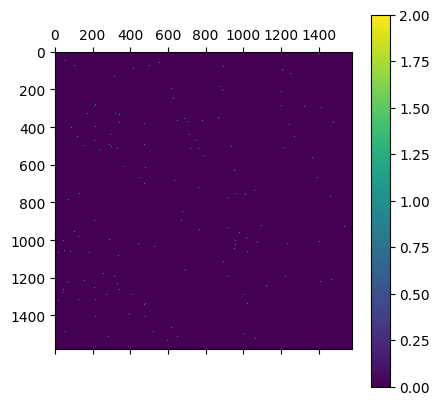

In [25]:
# Use random forest to predict the recipes
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Extract features and target
X = embedded_ingre.drop(columns=['recipes', 'id', 'ingredients'])
y = embedded_ingre['recipes'].values

# Apply PCA
pca = PCA(n_components=50)  # Adjust the number of components as needed
X_reduced = pca.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Train
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)

# Evaluate
accuracy_score(y_test, y_pred)

# Visualize accuracy
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.matshow(cm)
plt.colorbar()
plt.show()

In [26]:
accuracy_score(y_test, y_pred)

0.0027164685908319186

In [11]:
# import torch
# from transformers import AutoTokenizer, AutoModel

In [12]:
# # Load pre-trained BERT model and tokenizer
# model_name = 'bert-base-uncased'
# tokenizer = AutoTokenizer.from_pretrained(model_name)
# model = AutoModel.from_pretrained(model_name)

In [13]:
# inputs = tokenizer(data['ingredients'].tolist(), return_tensors='pt', padding=True, truncation=True, max_length=10)

In [14]:
# # Get the embeddings
# with torch.no_grad():
#     outputs = model(**inputs)

# # `outputs` is a dictionary with several components. `last_hidden_state` contains the embeddings
# embeddings = outputs.last_hidden_state

In [15]:
# # We can take the mean of the token embeddings to get a single vector per ingredient
# ingredient_embeddings = embeddings.mean(dim=1)

# # (shape n_ingredients x 768)
# ingredient_embeddings  

In [16]:
# import nltk
# nltk.download('punkt')
# # from nltk.cluster import KMeansClusterer
# from nltk.tokenize import word_tokenize
# # from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.preprocessing import StandardScaler

In [17]:
# # Tokenize the ingredients
# ingredient_tokens = [word_tokenize(ingredient) for ingredient in data['ingredients']]

# # Convert tokens back to string for TF-IDF vectorization
# ingredient_texts = [' '.join(tokens) for tokens in ingredient_tokens]

# data_set = set(data)
# ingre_set = set(ingredient_texts)

# # Find the difference
# missing_in_tokenized = data_set - ingre_set
# missing_in_tokenized

In [18]:
# # Find difference between data and ingredient_text
# data['ingredients'] = ingredient_texts

In [19]:
# # TF-IDF vectorization
# vectorizer = TfidfVectorizer(stop_words='english')
# X = vectorizer.fit_transform(ingredient_texts)

# # Normalize the TF-IDF matrix
# scaler = StandardScaler()
# X_normalized = scaler.fit_transform(X.toarray())

In [20]:
# # Apply KMeans clustering with NLTK
# num_clusters = 5  # Adjust as needed
# kclusterer = KMeansClusterer(num_clusters, distance=nltk.cluster.util.cosine_distance, repeats=25)
# assigned_clusters = kclusterer.cluster(X_normalized, assign_clusters=True)

# # Visualize the clusters
# plt.figure(figsize=(10, 6))
# plt.scatter(X_normalized[:, 0], X_normalized[:, 1], c=assigned_clusters, cmap='viridis')
# plt.xlabel('Normalized TF-IDF Feature 1')
# plt.ylabel('Normalized TF-IDF Feature 2')
# plt.title('Clusters of Ingredients')
# plt.show()

In [21]:
# import numpy as np

# # Get cluster means
# cluster_means = np.array(kclusterer.means())

# # Calculate distances between each point and cluster means
# distances = np.linalg.norm(X_normalized[:, np.newaxis] - cluster_means, axis=2)

# # Assign labels based on the nearest cluster mean
# labels = np.argmin(distances, axis=1)

# data['cluster'] = labels
# data.head()